## Imports

In [1]:
# Standard imports
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn-white')
import shutil
import os, sys

# eKDS Stuff
from src.Graph import Background, Circle, Disk, N_Particle_Event
from src.eKDS import Graph, eKDS, emd
from src.plot_utils import load_data, plot, plot_event, make_gif, timer_func

from utils import load_dataset

## Datasets

This part of the code can be modified, as long as the final datasets have the same format! Doesn't have to be physics-themed

In [2]:
# Parameters
R = 0.5
N = 50
epochs = 150
mass_lower = 145
mass_upper = 205
plot_dir = "results"



signal = load_dataset("../Datasets/top/v0/signal_train.npy", N, mass_lower, mass_upper)
background = load_dataset("../Datasets/top/v0/background_train.npy", N, mass_lower, mass_upper)
events = [signal, background]
event_labels = ["signal", "background"]
colors = ["red", "blue"]

(5000, 200, 3)
170.14751237913686
158.14683432895006
160.5525280786717
673.2730074731307
158.8003523061166
146.58183679004242
209.65647795402072
176.80587633984013
165.6156891417195
164.2996774629894
200.8383523275689
187.74816036097872
142.7700390479949
177.11962586816355
187.83995566253097
1400.1753013252696
149.8005426203515
166.05038121994187
189.45190198082344
603.3808106373469
159.0662704177803
143.32580237420927
156.78371969371725
184.16763517540244
175.4614611924286
175.5659742065055
206.35425698026543
229.8561812086776
216.26513417594518
197.89795128374794
193.1194642847027
225.03684198480786
190.51561821457364
193.70560176918565
152.27792245422583
182.60522991006468
180.30165938167085
177.634287595678
177.14072109907892
1504.686574787074
163.08714669533353
992.259889072041
475.59649957732563
165.94872079306379
155.91107655629392
1712.2231886899272
184.315767511387
137.335728326038
206.69208063720248
159.09374981701774
278.5697386705868
191.23026757056715
176.1187854407382
158

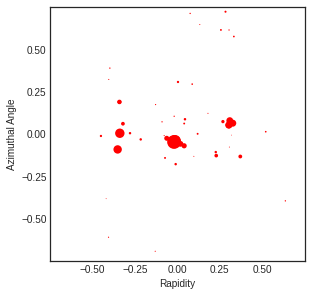

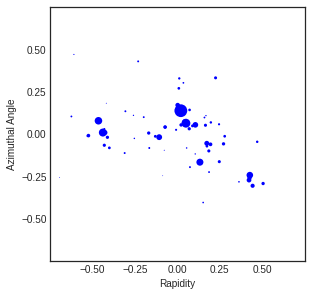

In [3]:
# Example plots
example_signal = signal[0]
plot_event(example_signal[0], example_signal[1], R, color = "red")

example_background = background[0]
plot_event(example_background[0], example_background[1], R, color = "blue")

## Observables

In [4]:
# Define a generic observable. This is a function that takes an event and a shape, trains the NN, and returns the EMD+shape parameters:
@timer_func
def generic_obseravble(event, shapes, R, plot_dir = None, name = None, color = None,**kwargs):
    
    
    y_i, z_i = event

    # Obersvable (l, parameters) = result of training a network
    net = eKDS(shapes, R)
    l, x_ij  = net.train(y_i, z_i, epochs, lr = 0.05, **kwargs)
    
    # Optionally plot the event and learned polygon
    if plot_dir is not None:
        y_j, z_j = net.get_samples()
        plot(y_i, z_i, y_j, z_j, x_ij, l, R, 0.0, plot_dir + "_%s.png" % name, name, shapes, color, )

    return l, shapes

Can change these observables to any shapes you want!

In [5]:
# One-diskness
def one_subjettiness(event, plot_dir = None, color = None, **kwargs):
            return generic_obseravble(event,
            shapes = [ N_Particle_Event( [(0,0),], N = 1) ],
            R = R,
            plot_dir = plot_dir,
            name = "1-Subjettiness",
            color = color,
            **kwargs
            )

# Two-diskness
def two_subjettiness(event, plot_dir = None, color = None, **kwargs):
            return generic_obseravble(event,
            shapes = [ N_Particle_Event( [(0,-0.1), (0,0.1)], N = 2) ],
            R = R,
            plot_dir = plot_dir,
            name = "2-Subjettiness",
            color = color,
            **kwargs
            )

# Three-diskness
def three_subjettiness(event, plot_dir = None, color = None, **kwargs):
            return generic_obseravble(event,
            shapes = [ N_Particle_Event( [(0,-0.1), (0, 0.0), (0,0.1)], N = 3) ],
            R = R,
            plot_dir = plot_dir,
            name = "3-Subjettiness",
            color = color,
            **kwargs
            )

observables = [one_subjettiness, two_subjettiness, three_subjettiness]
observable_labels = ["1-Subjettienss", "2-Subjettiness", "3-Subjettiness"]


## Run 

In [6]:
emds = np.zeros(shape = (len(events),len(observables), N))
times = np.zeros(shape = (len(events),len(observables), N))

# Calculate the EMDs for each observable, for each event
for (i, event_type) in enumerate(events):
    for (j, obs) in enumerate(observables):
        for (k, event) in enumerate(events[i]):

            # Generic observable has the timer flag - returns time
            (l, shapes), time = obs(event, 
                            plot_dir = None, # plot_dir + "/%s/event_%d" % (event_labels[i], k), 
                            color = colors[i],
                            # flavor_text = "%s Event %s %d" % (observable_labels[j], event_labels[i], k)
                            )
            emds[i,j,k] = l
            times[i,j,k] = time

Epoch 0: 0.495, z0 = 1.000
Epoch 1: 0.512, z0 = 1.000
Epoch 2: 0.494, z0 = 1.000
Epoch 3: 0.487, z0 = 1.000
Epoch 4: 0.494, z0 = 1.000
Epoch 5: 0.493, z0 = 1.000
Epoch 6: 0.485, z0 = 1.000
Epoch 7: 0.478, z0 = 1.000
Epoch 8: 0.488, z0 = 1.000
Epoch 9: 0.481, z0 = 1.000
Epoch 10: 0.480, z0 = 1.000
Epoch 11: 0.484, z0 = 1.000
Epoch 12: 0.484, z0 = 1.000
Epoch 13: 0.480, z0 = 1.000
Epoch 14: 0.479, z0 = 1.000
Epoch 15: 0.479, z0 = 1.000
Epoch 16: 0.479, z0 = 1.000
Epoch 17: 0.480, z0 = 1.000
Epoch 18: 0.479, z0 = 1.000
Epoch 19: 0.478, z0 = 1.000
Epoch 20: 0.479, z0 = 1.000
Epoch 21: 0.480, z0 = 1.000
Epoch 22: 0.477, z0 = 1.000
Epoch 23: 0.479, z0 = 1.000
Epoch 24: 0.481, z0 = 1.000
Epoch 25: 0.480, z0 = 1.000
Epoch 26: 0.476, z0 = 1.000
Epoch 27: 0.477, z0 = 1.000
Epoch 28: 0.479, z0 = 1.000
Epoch 29: 0.478, z0 = 1.000
Epoch 30: 0.479, z0 = 1.000
Epoch 31: 0.480, z0 = 1.000
Epoch 32: 0.479, z0 = 1.000
Epoch 33: 0.478, z0 = 1.000
Epoch 34: 0.481, z0 = 1.000
Epoch 35: 0.477, z0 = 1.000
Ep

## Plots

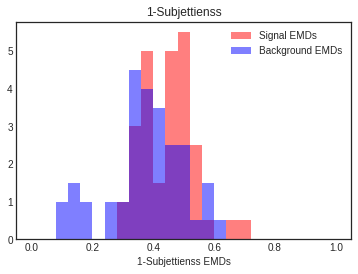

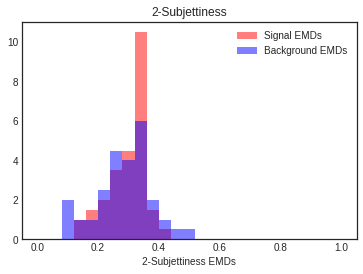

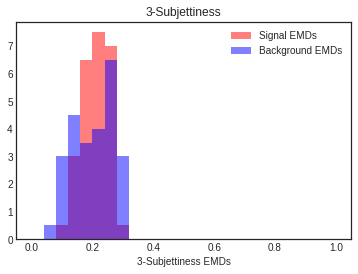

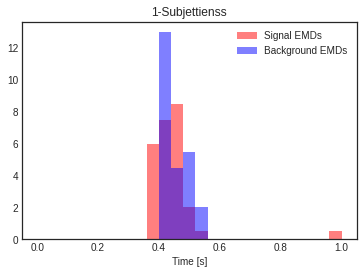

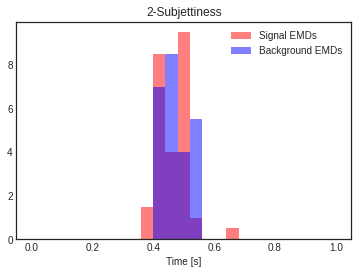

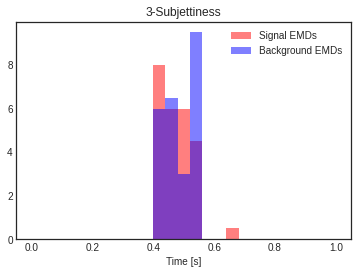

In [7]:
np.save("emds.npy", emds, )

for (j, obs) in enumerate(observables):
    plt.hist(emds[0,j,:], bins = 25, range=(0.0, 1.0), density = True, color = "red", label = "Signal EMDs", histtype="stepfilled", alpha = 0.5)
    plt.hist(emds[1,j,:], bins = 25, range=(0.0, 1.0), density = True, color = "blue", label = "Background EMDs", histtype="stepfilled", alpha = 0.5)
    plt.title(observable_labels[j])
    plt.xlabel(r"%s EMDs" % observable_labels[j])
    plt.legend()
    plt.show()


for (j, obs) in enumerate(observables):
    plt.hist(times[0,j,:], bins = 25, range=(0.0, 1.0), density = True, color = "red", label = "Signal EMDs", histtype="stepfilled", alpha = 0.5)
    plt.hist(times[1,j,:], bins = 25, range=(0.0, 1.0), density = True, color = "blue", label = "Background EMDs", histtype="stepfilled", alpha = 0.5)
    plt.title(observable_labels[j])
    plt.xlabel("Time [s]")
    plt.legend()
    plt.show()
    

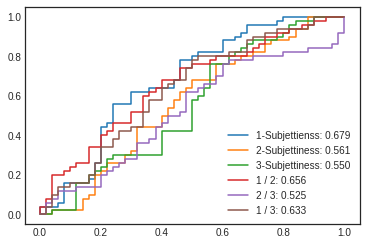

In [8]:
# AUC 
from sklearn import metrics

y = np.array([1]*N + [0]*N)
for j in range(len(observables)):
    pred = np.concatenate( (emds[0,j,:], emds[1,j,:]))
    fpr, tpr, thresholds = metrics.roc_curve(y, pred)
    plt.plot(fpr, tpr, label = "%s: %.3f" %(observable_labels[j],metrics.auc(fpr, tpr) ))


def sigmoid(z):
    return 1/(1+np.exp(-z))

combos = ((0,1), (1,2), (0,2))
for combo in combos:
    pred = sigmoid(np.concatenate( (emds[0,combo[0],:], emds[1,combo[0],:])) / np.concatenate( (emds[0,combo[1],:], emds[1,combo[1],:])))
    fpr, tpr, thresholds = metrics.roc_curve(y, pred)
    plt.plot(fpr, tpr, label = "%d / %d: %.3f" % (combo[0]+1, combo[1]+1,metrics.auc(fpr, tpr) ))
# plt.plot(fpr, tpr, label = "%s: %.3f" %("1 / 3",metrics.auc(fpr, tpr) ))

plt.legend()
# plt.plot(fpr, tpr, label = "%s: %.3f" %("1 / 3",metrics.auc(fpr, tpr) ))


(50, 3)
(50, 3)


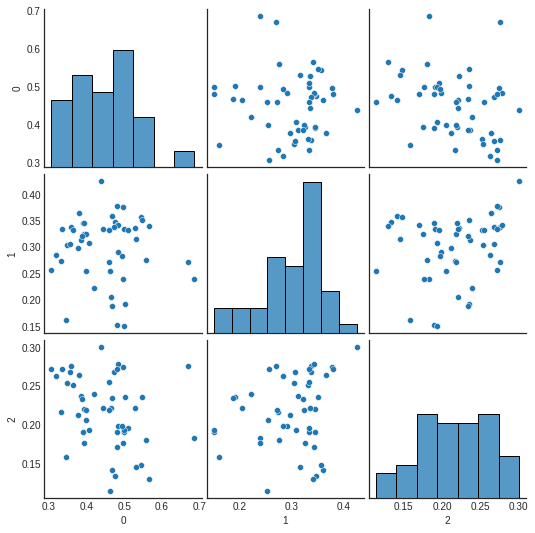

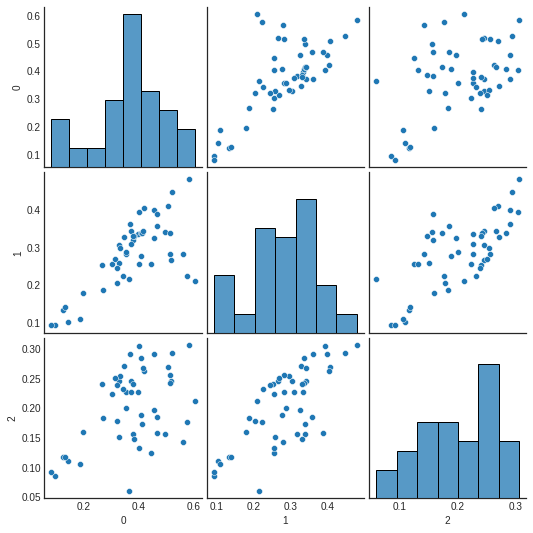

In [9]:
# Fancy plots
import seaborn as sns
import pandas as pd

df = pd.DataFrame(np.transpose(emds[0]), )
print(df.shape)
sns.pairplot(df)

df = pd.DataFrame(np.transpose(emds[1]), )
print(df.shape)
sns.pairplot(df)


# N-Jettiness 


In [10]:
Nsub

NameError: name 'Nsub' is not defined